## Importing The Libraries

In [1]:
import os, types
import pandas as pd

data = "D:\\IBM_GIT\\IBM-Project-2625-1658478416\\Project Development Phase\\Sprint 2\\loan_train.csv"
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import  MaxAbsScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


## Reading The Dataset

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [5]:
df.shape

(491, 14)

In [6]:
df=df.drop(columns=["Loan_ID"],axis=1)

## Uni-Variate Analysis

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

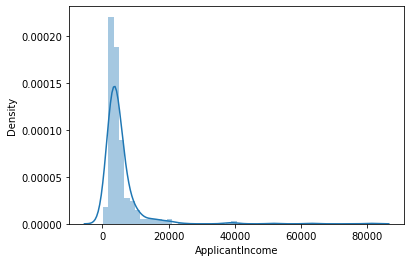

In [7]:
sns.distplot(df.ApplicantIncome)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

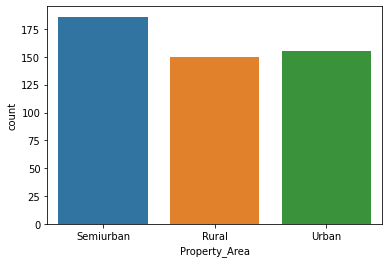

In [8]:
sns.countplot(df.Property_Area)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

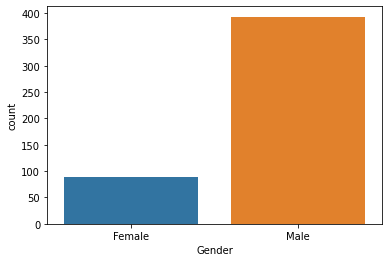

In [9]:
sns.countplot(df.Gender)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

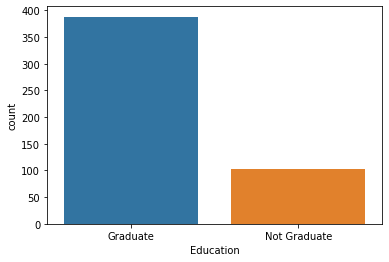

In [10]:
sns.countplot(df.Education)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

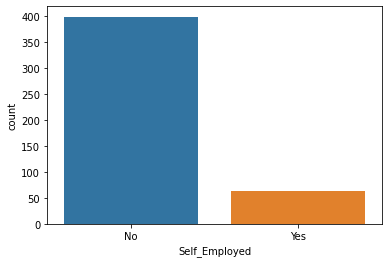

In [11]:
sns.countplot(df.Self_Employed)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

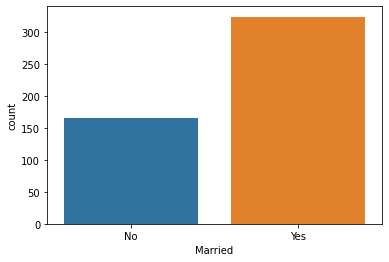

In [12]:
sns.countplot(df.Married)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

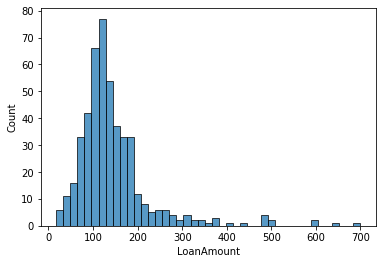

In [13]:
sns.histplot(df.LoanAmount)

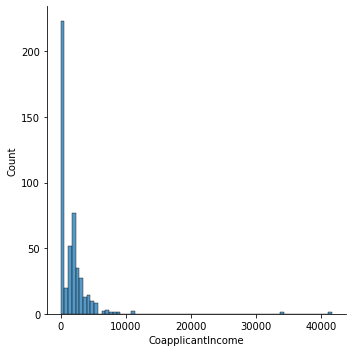

In [14]:
sns.displot(df.CoapplicantIncome)

([<matplotlib.patches.Wedge at 0x1ac27a8fdf0>,
 [Text(0.40872965677112233, 1.0212443721635682, 'Semi urban'),
  Text(-1.0709474773921899, -0.2511404003088809, 'Urban'),
  Text(0.6310943709832784, -0.9009549905035326, 'Rural')])

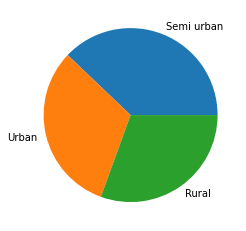

In [15]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

## Bivariate Analysis

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

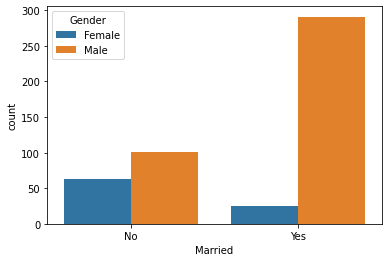

In [16]:
sns.countplot(df['Married'],hue=df['Gender'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

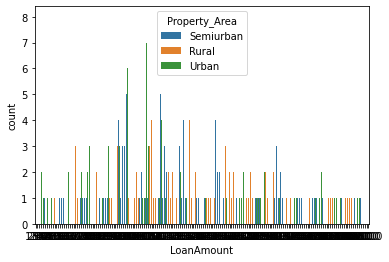

In [17]:
sns.countplot(df['LoanAmount'],hue=df['Property_Area'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

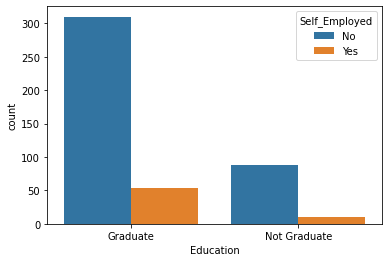

In [18]:
sns.countplot(df['Education'],hue=df['Self_Employed'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

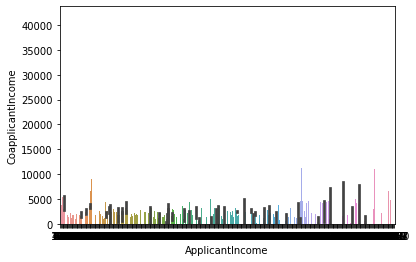

In [19]:
sns.barplot(df.ApplicantIncome,df.CoapplicantIncome)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

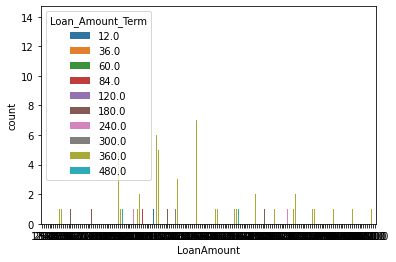

In [20]:
sns.countplot(df['LoanAmount'],hue=df['Loan_Amount_Term'])

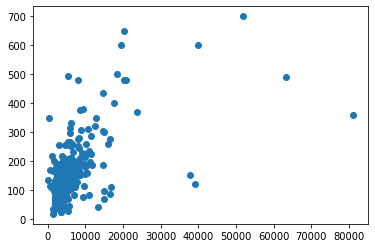

In [21]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

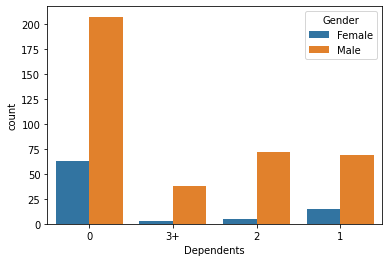

In [22]:
sns.countplot(df['Dependents'],hue=df['Gender'])

## Multi variate Analysis

<AxesSubplot:>

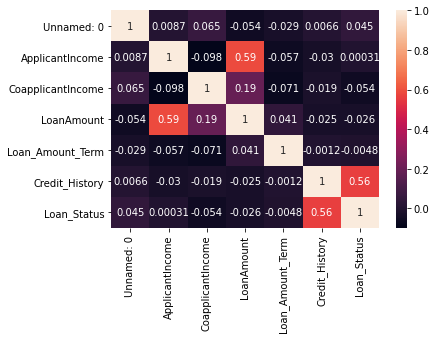

In [23]:
sns.heatmap(df.corr(),annot=True)

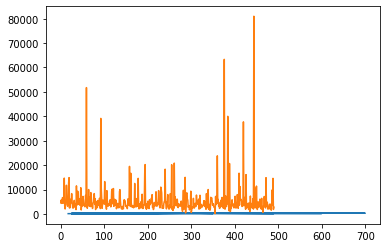

In [24]:
plt.plot(df.LoanAmount,df.Loan_Amount_Term,df.ApplicantIncome)

<AxesSubplot:>

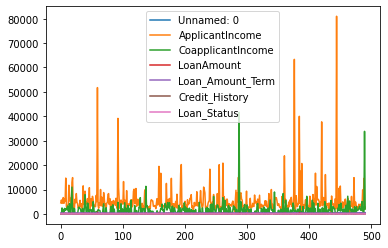

In [25]:
df.plot.line()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

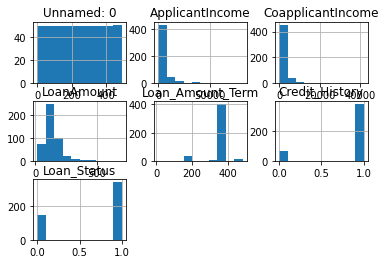

In [26]:
df.hist()

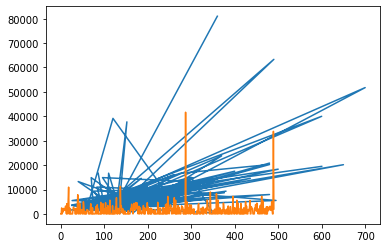

In [27]:
plt.plot(df.LoanAmount,df.ApplicantIncome,df.CoapplicantIncome)

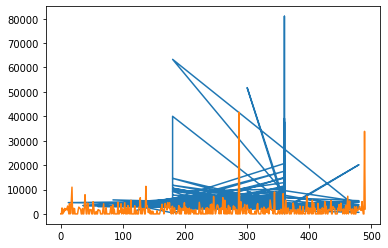

In [28]:
plt.plot(df.Loan_Amount_Term,df.ApplicantIncome,df.CoapplicantIncome)

## Descriptive Analysis

In [29]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [30]:
df.std()

Unnamed: 0            141.883755
ApplicantIncome      6419.427177
CoapplicantIncome    2919.320624
LoanAmount             86.310534
Loan_Amount_Term       66.964051
Credit_History          0.359214
Loan_Status             0.459345
dtype: float64

In [31]:
df.mean()

Unnamed: 0            245.000000
ApplicantIncome      5401.189409
CoapplicantIncome    1589.730998
LoanAmount            145.014737
Loan_Amount_Term      341.297071
Credit_History          0.848214
Loan_Status             0.698574
dtype: float64

In [32]:
df.mode()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,Yes,0,Graduate,No,4583.0,0.0,120.0,360.0,1.0,Semiurban,1.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Pre-Processing

## Check for Null Values

In [33]:
df.isnull().any()

Unnamed: 0           False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [34]:
df.isnull().sum()

Unnamed: 0            0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [36]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [37]:
df.isnull().any()

Unnamed: 0           False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [38]:
df.isnull().sum()

Unnamed: 0           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Categorical Values

In [39]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Female,No,0,Graduate,No,4547,0.0,115.0,360.000000,1.0,Semiurban,1
1,1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.000000,1.0,Rural,1
2,2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.000000,1.0,Urban,0
3,3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,341.297071,1.0,Urban,1
4,4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.000000,1.0,Semiurban,1


In [40]:
le=LabelEncoder()

In [41]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [42]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0,1
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2,0
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2,1
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1,1


## Spliting into dependent and independent data

In [43]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0,1
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2,0
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2,1
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1,1


In [44]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [45]:
x.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1


In [46]:
x.iloc[7]

Unnamed: 0              7.0
Gender                  1.0
Married                 1.0
Dependents              1.0
Education               1.0
Self_Employed           0.0
ApplicantIncome      5285.0
CoapplicantIncome    1430.0
LoanAmount            161.0
Loan_Amount_Term      360.0
Credit_History          0.0
Property_Area           1.0
Name: 7, dtype: float64

In [47]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Loan_Status, dtype: int64

## Scaling The Data

In [48]:
scaler = MaxAbsScaler()
x_sc=scaler.fit_transform(x)
x_sc

array([[0.        , 0.        , 0.        , ..., 0.75      , 1.        ,
        0.5       ],
       [0.00204082, 1.        , 1.        , ..., 0.75      , 1.        ,
        0.        ],
       [0.00408163, 0.        , 1.        , ..., 0.75      , 1.        ,
        1.        ],
       ...,
       [0.99591837, 1.        , 1.        , ..., 0.375     , 1.        ,
        0.        ],
       [0.99795918, 1.        , 0.        , ..., 0.75      , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.75      , 1.        ,
        0.        ]])

## Splitting Data Into Train and Test

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [50]:
xtrain.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
43,43,1,0,0,0,0,6283,4416.0,209.0,360.0,0.0,0
36,36,0,1,1,0,1,11500,0.0,286.0,360.0,0.0,2
139,139,1,1,0,0,0,2383,3334.0,172.0,360.0,1.0,1
91,91,1,1,0,0,0,2221,0.0,60.0,360.0,0.0,2
106,106,1,1,1,0,0,9538,0.0,187.0,360.0,1.0,2


In [51]:
xtest.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
259,259,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1
18,18,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
446,446,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
198,198,1,1,2,1,0,4200,1430.0,129.0,360.0,1.0,0
128,128,1,1,0,0,0,2130,6666.0,70.0,180.0,1.0,1


In [52]:
ytrain.head()

43     0
36     0
139    1
91     0
106    1
Name: Loan_Status, dtype: int64

In [53]:
ytest.head()

259    0
18     0
446    1
198    0
128    0
Name: Loan_Status, dtype: int64

In [54]:
xtrain.shape

(392, 12)

In [55]:
xtest.shape

(99, 12)

In [56]:
ytrain.shape

(392,)

In [57]:
ytest.shape

(99,)

## Model Building

## Xgboost Model

In [58]:
xmodel=XGBClassifier(eval_metric='mlogloss',n_estimators=101,random_state=100,n_jobs=-1,max_leaves=5)

In [59]:
x_test = xtest.to_numpy()
x_train = xtrain.to_numpy()
y_test = ytest.to_numpy()
y_train = ytrain.to_numpy()
xmodel.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=5, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=101,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, ...)

In [60]:
ypredx=xmodel.predict(x_test)

In [61]:
ypred2x=xmodel.predict(x_train)

## Evaluating Performance Of The Model And Saving The Model

In [62]:
print("Xgboost Model Testing Accuracy")
print(accuracy_score(y_test,ypredx))
print("Xgboost Model Training Accuracy")
print(accuracy_score(y_train,ypred2x))

Xgboost Model Testing Accuracy
0.7777777777777778
Xgboost Model Training Accuracy
1.0


In [63]:
f1_score(ypredx,ytest,average='weighted')

0.7915349490691957

In [64]:
pd.crosstab(ytest,ypredx)

col_0,0,1
Loan_Status,,
0,15,16
1,6,62


In [65]:
print(classification_report(ytest,ypredx))

              precision    recall  f1-score   support

           0       0.71      0.48      0.58        31
           1       0.79      0.91      0.85        68

    accuracy                           0.78        99
   macro avg       0.75      0.70      0.71        99
weighted avg       0.77      0.78      0.76        99



In [66]:
xmodel.predict([[18,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1]])

array([1])

In [69]:
with open('./models/XGmodel.pkl', 'wb') as pickle_file:
    pickle.dump(xmodel, pickle_file)